# Machine Learning Project Template in Python
This section presents a project template that you can use to work through machine learning
problems in Python end-to-end.

## Template Summary
Below is the project template that you can use in your machine learning projects in Python.

In [ ]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

## Prepare Data

This step is about preparing the data in such a way that it best exposes the structure of the
problem and the relationships between your input attributes with the output variable. This
includes tasks such as:

- Cleaning data by removing duplicates, marking missing values and even imputing missing values.

- Feature selection where redundant features may be removed and new features developed.

- Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

Start simple. Revisit this step often and cycle with the next step until you converge on a
subset of algorithms and a presentation of the data that results in accurate or accurate-enough
models to proceed.

## Import libraries

First, let's import all of the modules.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load Dataset

In [3]:
d = {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'y': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5]}
dataset = pd.DataFrame(data=d)
dataset

,x,y
0,1,1
1,2,1
2,3,2
3,4,2
4,5,3
5,6,3
6,7,4
7,8,4
8,9,5
9,10,5


## Summarize the Dataset
Now it is time to take a look at the data. In this step we are going to take a look at the data a
few dierent ways:

- Dimensions of the dataset.
- Peek at the data itself.
- Statistical summary of all attributes.

Breakdown of the data by the class variable.
Don't worry, each look at the data is one command. These are useful commands that you
can use again and again on future projects.

## Dimensions of Dataset
We can get a quick idea of how many instances (rows) and how many attributes (columns) the
data contains with the shape property.

In [4]:
# shape
print(dataset.shape)

(10, 2)


## Peek at the Data
It is also always a good idea to actually eyeball your data.

In [7]:
# head
print(dataset.head(20))

    x  y
0   1  1
1   2  1
2   3  2
3   4  2
4   5  3
5   6  3
6   7  4
7   8  4
8   9  5
9  10  5


## Statistical Summary
Now we can take a look at a summary of each attribute. This includes the count, mean, the
min and max values as well as some percentiles.

In [8]:
# descriptions
print(dataset.describe())

              x          y
count  10.00000  10.000000
mean    5.50000   3.000000
std     3.02765   1.490712
min     1.00000   1.000000
25%     3.25000   2.000000
50%     5.50000   3.000000
75%     7.75000   4.000000
max    10.00000   5.000000


## Class Distribution
Let's take a look at the number of instances (rows) that belong to each class. We can view this
as an absolute count.

In [12]:
# class distribution
print(dataset.groupby('x').size())

x
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
dtype: int64


In [13]:
# class distribution
print(dataset.groupby('y').size())

y
1    2
2    2
3    2
4    2
5    2
dtype: int64


In [21]:
import numpy

correlations = dataset.corr()
# plot correlation matrix

correlations

,x,y
x,1.000000,0.984732
y,0.984732,1.000000


## Data Visualization
We now have a basic idea about the data. We need to extend this with some visualizations. We
are going to look at two types of plots:
- Univariate plots to better understand each attribute.
- Multivariate plots to better understand the relationships between attributes.


## Univariate Plots
We will start with some univariate plots, that is, plots of each individual variable. Given that
the input variables are numeric, we can create box and whisker plots of each.

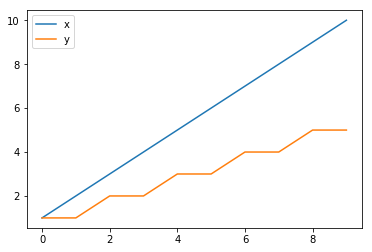

In [14]:
dataset.plot()

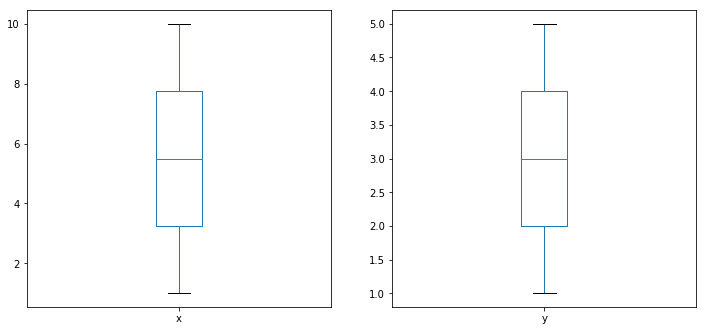

In [15]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12, 12))
pyplot.show()

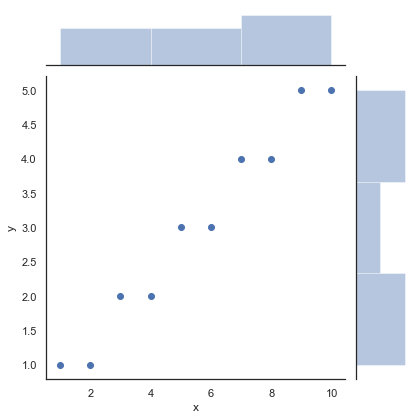

In [16]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
p = sns.jointplot(data=dataset,x='x', y='y')

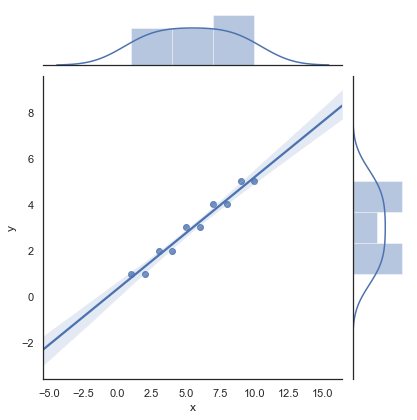

In [18]:
 g = sns.jointplot("x", "y", data=dataset, kind="reg")

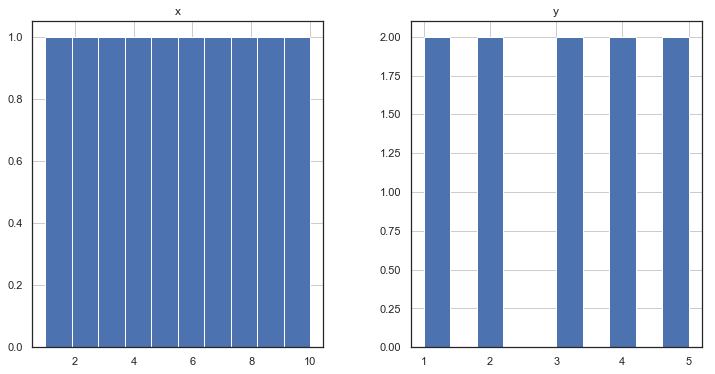

In [19]:
# histograms
dataset.hist(figsize=(12, 6))
pyplot.show()

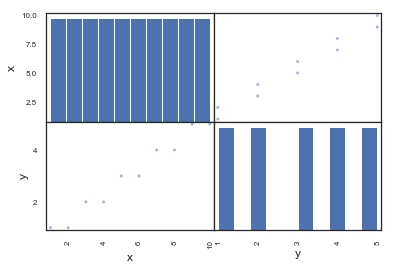

In [20]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

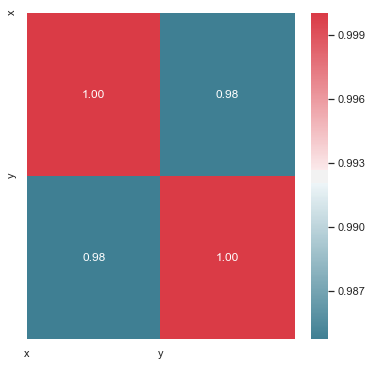

In [23]:
#Correlation matrix for the features    
   
fig, ax = plt.subplots(figsize=(6, 6))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(correlations.columns)), correlations.columns);
plt.yticks(range(len(correlations.columns)), correlations.columns)
plt.show()

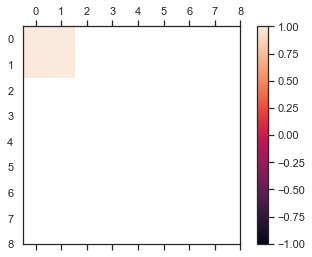

In [26]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names)
#ax.set_yticklabels(names)
pyplot.show()

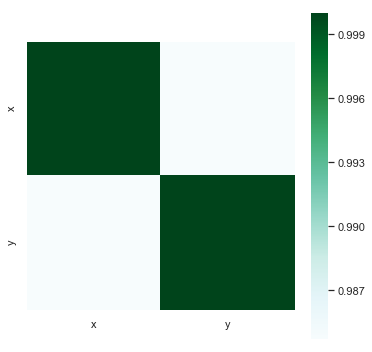

In [28]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlations, square = True,cmap='BuGn')

## Scatter Plot Matrix
A scatter plot shows the relationship between two variables as dots in two dimensions, one
axis for each attribute. You can create a scatter plot for each pair of attributes in your data.
Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful
for spotting structured relationships between variables, like whether you could summarize the
relationship between two variables with a line. Attributes with structured relationships may
also be correlated and good candidates for removal from your dataset.

In [29]:
# Scatterplot Matrix
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix

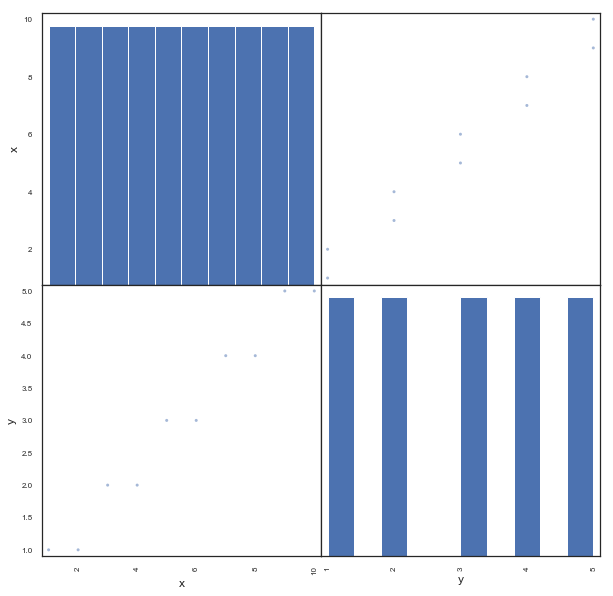

In [31]:
scatter_matrix(dataset, figsize=(10, 10))
pyplot.show()

## Multivariate Plots
Now we can look at the interactions between the variables. Let's look at scatter plots of all
pairs of attributes. This can be helpful to spot structured relationships between input variables.

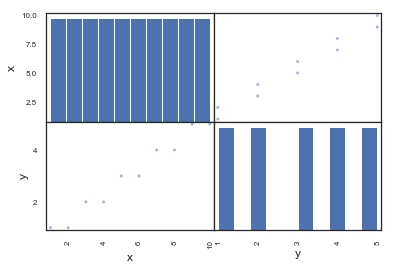

In [38]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

## Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross-validation.
3. Build 5 dierent models to predict species from ower measurements
4. Select the best model.

## Create a Validation Dataset
We need to know whether or not the model that we created is any good. Later, we will use
statistical methods to estimate the accuracy of the models that we create on unseen data.
We also want a more concrete estimate of the accuracy of the best model on unseen data by
evaluating it on actual unseen data. That is, we are going to hold back some data that the
algorithms will not get to see and we will use this data to get a second and independent idea of

from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [39]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:1]
Y = array[:,1]

In [40]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [41]:
Y

array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5])

In [42]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)

In [43]:
X_train

array([[ 1],
       [ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]])

In [44]:
X_test

array([[9],
       [2],
       [6]])

In [45]:
y_train

array([1, 4, 2, 5, 3, 2, 4])

In [46]:
y_test

array([5, 1, 3])

## Test Harness
We will use 10-fold cross-validation to estimate accuracy on unseen data. This will split our
dataset into 10 parts, e.g. the model will train on 9 and test on 1 and repeat for all combinations
of train-test splits. We are using the metric of accuracy to evaluate models. This is a proportion
of the number of correctly predicted instances divided by the total number of instances in the
dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring
variable when we run build and evaluate each model next.


## Build Models
We don't know which algorithms would be good on this problem or what congurations to use.
We got an idea from the plots that some of the classes are partially linearly separable in some
dimensions, so we are expecting generally good results. Let's evaluate six dierent algorithms:
- Logistic Regression (LR).
- Linear Discriminant Analysis (LDA).
- k-Nearest Neighbors (KNN).
- Classication and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

This list is a good mixture of simple linear (LR and LDA), and nonlinear (KNN, CART,
NB and SVM) algorithms. We reset the random number seed before each run to ensure that
the evaluation of each algorithm is performed using exactly the same data splits. It ensures the
results are directly comparable. Let's build and evaluate our ve models:

In [50]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=2, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.000000 (0.000000)
CART: 0.200000 (0.000000)
NB: 0.000000 (0.000000)
SVM: 0.000000 (0.000000)


/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-pa

## Select The Best Model
We now have 6 models and accuracy estimations for each. We need to compare the models to
each other and select the most accurate. Running the example above, we get the following raw
results:


We can see that it looks like KNN has the largest estimated accuracy score. We can also
create a plot of the model evaluation results and compare the spread and the mean accuracy
of each model. There is a population of accuracy measures for each algorithm because each
algorithm was evaluated 10 times (10 fold cross-validation).

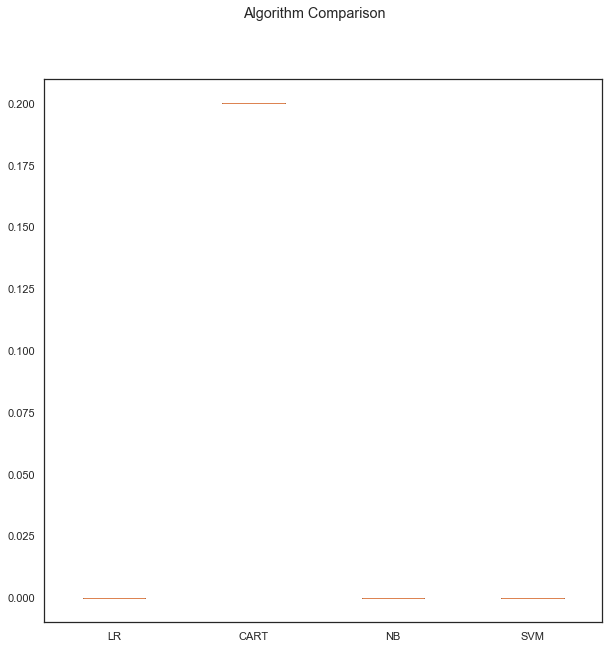

In [51]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Make Predictions
The KNN algorithm was the most accurate model that we tested. Now we want to get an idea
of the accuracy of the model on our validation dataset. This will give us an independent nal
check on the accuracy of the best model. It is important to keep a validation set just in case
you made a slip during training, such as overtting to the training set or a data leak. Both
will result in an overly optimistic result. We can run the KNN model directly on the validation
set and summarize the results as a nal accuracy score, a confusion matrix and a classication
report.

In [52]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict(X_test)
predictions = clf.predict(X_test)
print(predictions)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[5 1 3]
1.0
[[1 0 0]
 [0 1 0]
 [0 0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



## Predictions by math 

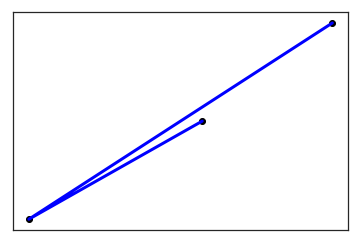

In [53]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [54]:
import pandas as pd
import numpy as np
from statistics import mean

In [55]:
d = {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'y': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5]}
dataset2 = pd.DataFrame(data=d)
dataset2

,x,y
0,1,1
1,2,1
2,3,2
3,4,2
4,5,3
5,6,3
6,7,4
7,8,4
8,9,5
9,10,5


In [56]:
mean_x = mean(dataset2['x'])
mean_x

5.5

In [57]:
mean_y = mean(dataset2['y'])
mean_y

3

B0 = mean(y) - B1 * mean(x)

B1 = corr(x; y) . stdev(y) / stdev(x)

In [58]:
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

In [59]:
print(pearson_def([1,2,3,4,5,6,7,8,9,10], [1,1,2,2,3,3,4,4,5,5]))

0.9847319278346618


In [60]:
std_x = np.std(dataset2['x'])
std_x

2.8722813232690143

In [61]:
std_y = np.std(dataset2['y'])
std_y 

1.4142135623730951

In [62]:
B1 = pearson_def([1,2,3,4,5,6,7,8,9,10], [1,1,2,2,3,3,4,4,5,5]) * (std_y / std_x)
B1

0.4848484848484848

In [63]:
B0 = mean_y - B1 * mean_x
B0

0.3333333333333335

In [64]:
data_x = np.arange(11,21)
data_x

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [65]:
data_y = []
for i in data_x:
    y_ = B0 + B1 * i    
    data_y.append(y_)

    print(data_y)

[5.666666666666666]
[5.666666666666666, 6.1515151515151505]
[5.666666666666666, 6.1515151515151505, 6.636363636363637]
[5.666666666666666, 6.1515151515151505, 6.636363636363637, 7.121212121212121]
[5.666666666666666, 6.1515151515151505, 6.636363636363637, 7.121212121212121, 7.6060606060606055]
[5.666666666666666, 6.1515151515151505, 6.636363636363637, 7.121212121212121, 7.6060606060606055, 8.09090909090909]
[5.666666666666666, 6.1515151515151505, 6.636363636363637, 7.121212121212121, 7.6060606060606055, 8.09090909090909, 8.575757575757576]
[5.666666666666666, 6.1515151515151505, 6.636363636363637, 7.121212121212121, 7.6060606060606055, 8.09090909090909, 8.575757575757576, 9.06060606060606]
[5.666666666666666, 6.1515151515151505, 6.636363636363637, 7.121212121212121, 7.6060606060606055, 8.09090909090909, 8.575757575757576, 9.06060606060606, 9.545454545454545]
[5.666666666666666, 6.1515151515151505, 6.636363636363637, 7.121212121212121, 7.6060606060606055, 8.09090909090909, 8.57575757575

In [66]:
df = pd.DataFrame({'x': data_x,
                   'y': data_y})

In [67]:
df

,x,y
0,11,5.666667
1,12,6.151515
2,13,6.636364
3,14,7.121212
4,15,7.606061
5,16,8.090909
6,17,8.575758
7,18,9.060606
8,19,9.545455
9,20,10.030303


In [68]:
df_ = round(df)
df_

,x,y
0,11,6.0
1,12,6.0
2,13,7.0
3,14,7.0
4,15,8.0
5,16,8.0
6,17,9.0
7,18,9.0
8,19,10.0
9,20,10.0


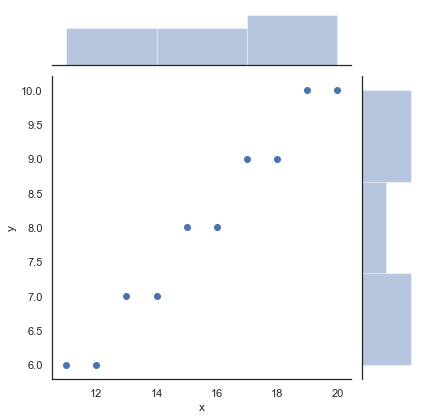

In [69]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
p = sns.jointplot(data=df_,x='x', y='y')

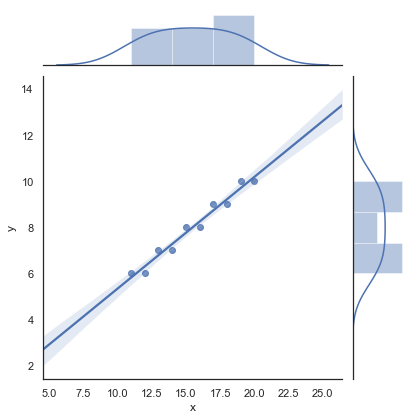

In [70]:
 g = sns.jointplot("x", "y", data=df_, kind="reg")

In [71]:
df.shape

(10, 2)

In [72]:
std_x2 = np.std(df['x'])
std_x2

2.8722813232690143

In [73]:
std_y2 = np.std(df['y'])
std_y2

1.3926212476455828

In [74]:
B1_2 = pearson_def([11,12,13,14,15,16,17,18,19,20], [5.598076,6.070454,6.542831,7.015209,7.487586,7.959964,8.432341,8.904719,9.377096,9.849474]) * (std_y2 / std_x2)
B1_2

0.4848484848484769

In [ ]:
dataset

## MSE

In [83]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dataset['y'], df['y'])
mse

23.568411386593205

## MAE

In [84]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(dataset['y'], df['y'])
mae

4.848484848484849

In [89]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(dataset['y'], data)
acc

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets